**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(pheatmap)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.fcc.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.final.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.test.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.total.tsv 


## Import data

In [4]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, "region_coverage_fcc_score", 
        txt_folder, 
        "summary"
    )
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     11

$fcc_astarr_macs_input_union
[1] 639718     11



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


## Arrange table

In [5]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import
dat = lst[[txt]]
dat_region_score_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-2.1177891,-3.7814427,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.3206124,0.5653917,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-1.1744478,-2.0997884,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


In [6]:
dat = dat_region_score_import
dat = dat %>% 
    dplyr::mutate(Assay = Assay_Label) %>%
    dplyr::select(Region, Zcore, Assay) %>%
    tidyr::spread(Assay, Zcore)

dat_region_score_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 246851      7


Region,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR
chr1:100006256-100006880,0.1455252,NA,NA,NA,NA,-1.283181
chr1:100010437-100010915,-1.2667511,NA,NA,NA,NA,-0.802340
chr1:10002087-10003910,-0.4550979,NA,NA,NA,NA,-1.009224


## Calculate pairwise correlations across assays

**Assay pairs for looping**

In [7]:
dat = dat_region_score_import
vec = unique(dat$Assay_Label)
print(vec)

[1] "ASTARR"         "WSTARR"         "TMPRA"          "LMPRA"         
[5] "CRISPRi-Growth" "CRISPRi-HCRFF" 


In [8]:
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
names(vec) = vec
vec_txt_assay = vec

In [9]:
vec = vec_txt_assay
dat = expand.grid(vec, vec) |> t() |> as.data.frame()

dat_assay_pair = dat
fun_display_table(dat)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36
Var1,ASTARR,WSTARR,TMPRA,LMPRA,CRISPRi-HCRFF,CRISPRi-Growth,ASTARR,WSTARR,TMPRA,LMPRA,CRISPRi-HCRFF,CRISPRi-Growth,ASTARR,WSTARR,TMPRA,LMPRA,CRISPRi-HCRFF,CRISPRi-Growth,ASTARR,WSTARR,TMPRA,LMPRA,CRISPRi-HCRFF,CRISPRi-Growth,ASTARR,WSTARR,TMPRA,LMPRA,CRISPRi-HCRFF,CRISPRi-Growth,ASTARR,WSTARR,TMPRA,LMPRA,CRISPRi-HCRFF,CRISPRi-Growth
Var2,ASTARR,ASTARR,ASTARR,ASTARR,ASTARR,ASTARR,WSTARR,WSTARR,WSTARR,WSTARR,WSTARR,WSTARR,TMPRA,TMPRA,TMPRA,TMPRA,TMPRA,TMPRA,LMPRA,LMPRA,LMPRA,LMPRA,LMPRA,LMPRA,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth


**Loop through each pair and calculate Spearman correlation**

In [10]:
lst = lapply(dat_assay_pair, function(idxs){
    ### get assay pair
    txt_assay1 = idxs[1]
    txt_assay2 = idxs[2]

    ### get assay scores at overlapped regions
    dat = dat_region_score_arrange
    dat = dat %>% dplyr::select({{idxs}}) %>% na.omit
    
    ### calculate Spearman correlations
    res      = cor(dat, method="spearman")
    num_corr = res[txt_assay1, txt_assay2]
    num_size = nrow(dat)
    
    ### summarize results
    res = list(
        "Assay1"      = txt_assay1, 
        "Assay2"      = txt_assay2, 
        "Count"       = num_size,
        "Correlation" = num_corr
    )
    return(res)
})
dat = bind_rows(lst)

### assign and show
dat_assay_corr = dat
print(dim(dat))
fun_display_table(dat)

[1] 36  4


Assay1,Assay2,Count,Correlation
ASTARR,ASTARR,246850,1.0000000
WSTARR,ASTARR,241030,0.3026786
TMPRA,ASTARR,1722,0.2644954
LMPRA,ASTARR,68497,0.2289869
CRISPRi-HCRFF,ASTARR,1330,0.0386677
CRISPRi-Growth,ASTARR,80288,-0.0180952
ASTARR,WSTARR,241030,0.3026786
WSTARR,WSTARR,241031,1.0000000
TMPRA,WSTARR,1700,0.5406762
LMPRA,WSTARR,67728,0.4005676


**Convert data from long form to wide form**

In [11]:
### convert data from long form to wide form
dat = dat_assay_corr
dat = dat %>% dplyr::mutate(Correlation = as.double(Correlation))
dat = dat %>% 
    dplyr::select(Assay1, Assay2, Correlation) %>%
    tidyr::spread(Assay2, Correlation)
dat = dat %>% column_to_rownames("Assay1")

### assign and show
mat_assay_corr = dat
vec = c("ASTARR", "LMPRA", "TMPRA", "WSTARR", "CRISPRi-Growth", "CRISPRi-HCRFF")
round(dat[vec, vec], 2)

,ASTARR,LMPRA,TMPRA,WSTARR,CRISPRi-Growth,CRISPRi-HCRFF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASTARR,1.00,0.23,0.26,0.30,-0.02,0.04
LMPRA,0.23,1.00,0.44,0.40,0.07,0.02
TMPRA,0.26,0.44,1.00,0.54,0.15,0.00
WSTARR,0.30,0.40,0.54,1.00,0.09,0.03
CRISPRi-Growth,-0.02,0.07,0.15,0.09,1.00,0.07
CRISPRi-HCRFF,0.04,0.02,0.00,0.03,0.07,1.00


## Clustering and visualize correlation matrix

**Colorscale (-1, 1)**

In [12]:
mat = mat_assay_corr

num_palette_length = 50
vec_txt_color = colorRampPalette(c("#4575b4", "white", "#d73027"))(num_palette_length)
vec_num_break = c(
    seq(-1,                   0, length.out = ceiling(num_palette_length / 2) + 1), 
    seq(1/num_palette_length, 1, length.out = floor(  num_palette_length / 2))
)

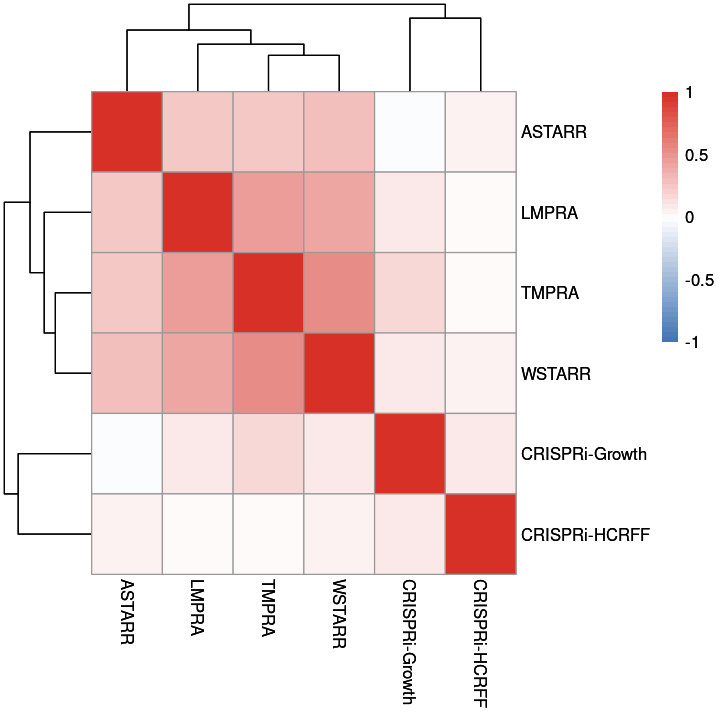

In [13]:
mat = mat_assay_corr
plt = pheatmap(
    mat,
    color  = vec_txt_color, 
    breaks = vec_num_break
)

options(repr.plot.height=6, repr.plot.width=6)
print(plt)

**Colorscale (-0.6, 0.6)**

In [14]:
mat = mat_assay_corr

num_palette_length = 50
vec_txt_color = colorRampPalette(c("#4575b4", "white", "#d73027"))(num_palette_length)
vec_num_break = c(
    seq(-0.6,                   0,   length.out = ceiling(num_palette_length / 2) + 1), 
    seq(1/num_palette_length,   0.6, length.out = floor(  num_palette_length / 2))
)

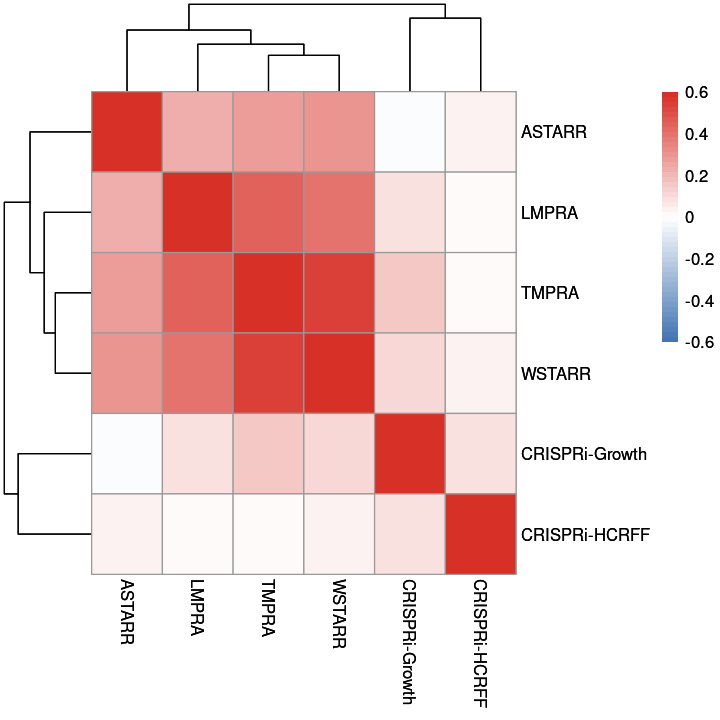

In [15]:
mat = mat_assay_corr
plt = pheatmap(
    mat,
    color  = vec_txt_color, 
    breaks = vec_num_break
)

plt_export_heatmap_full_starrmpracrispri = plt
options(repr.plot.height=6, repr.plot.width=6)
print(plt)

**Upper triangle plot**

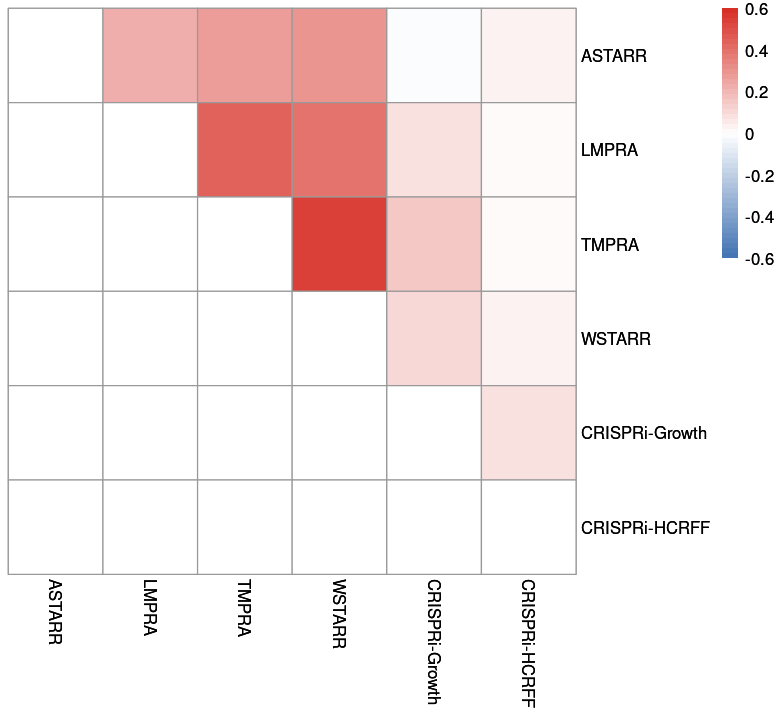

In [16]:
mat = mat_assay_corr
idx = c("ASTARR", "LMPRA", "TMPRA", "WSTARR", "CRISPRi-Growth", "CRISPRi-HCRFF")
mat = mat[idx, idx]

idx = lower.tri(mat, diag = TRUE)
mat[idx] = NA

plt = pheatmap(
    mat,
    color  = vec_txt_color, 
    breaks = vec_num_break, 
    cluster_rows = FALSE, 
    cluster_cols = FALSE,
    na_col="white"
)

options(repr.plot.height=6, repr.plot.width=6.5)
print(plt)

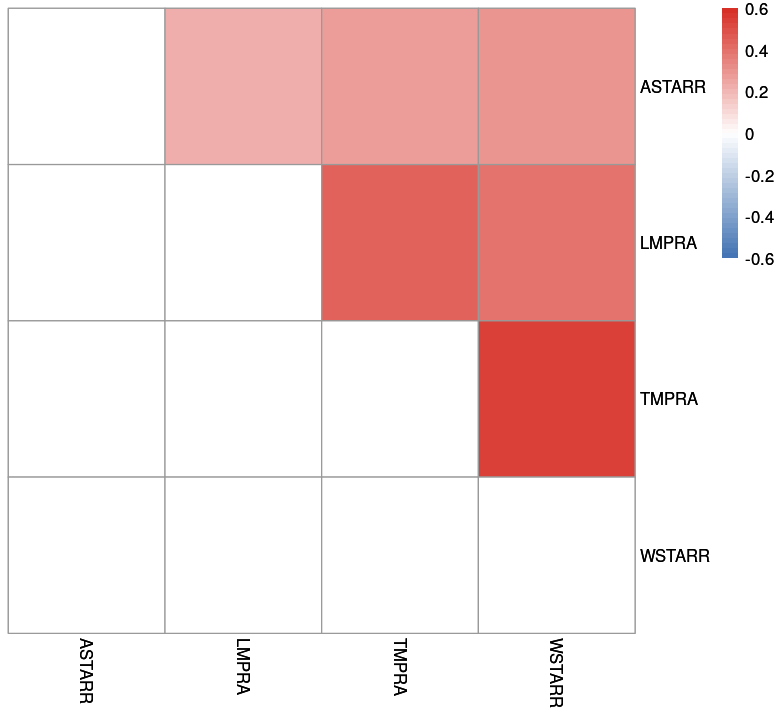

In [17]:
mat = mat_assay_corr
idx = c("ASTARR", "LMPRA", "TMPRA", "WSTARR")
mat = mat[idx, idx]

idx = lower.tri(mat, diag = TRUE)
mat[idx] = NA

plt = pheatmap(
    mat,
    color  = vec_txt_color, 
    breaks = vec_num_break, 
    cluster_rows = FALSE, 
    cluster_cols = FALSE,
    na_col="white"
)

plt_export_heatmap_upper_starrmpra = plt
options(repr.plot.height=6, repr.plot.width=6.5)
print(plt)

## Save results

**Show table**

In [18]:
### set assay order
idx = c("ASTARR", "LMPRA", "TMPRA", "WSTARR", "CRISPRi-Growth", "CRISPRi-HCRFF")

### arrange table
dat = mat_assay_corr
dat = dat[idx, idx]
dat = dat %>% 
    as.data.frame %>% 
    tibble::rownames_to_column("Assay") %>%
    as_tibble

### assign and show
tmp_assay_corr = dat
print(dim(dat))
fun_display_table(dat)

[1] 6 7


Assay,ASTARR,LMPRA,TMPRA,WSTARR,CRISPRi-Growth,CRISPRi-HCRFF
ASTARR,1.0000000,0.2289869,0.2644954,0.3026786,-0.0180952,0.0386677
LMPRA,0.2289869,1.0000000,0.4431628,0.4005676,0.0732455,0.0182321
TMPRA,0.2644954,0.4431628,1.0000000,0.5406762,0.1533737,0.0019486
WSTARR,0.3026786,0.4005676,0.5406762,1.0000000,0.0938136,0.0349937
CRISPRi-Growth,-0.0180952,0.0732455,0.1533737,0.0938136,1.0000000,0.0702657
CRISPRi-HCRFF,0.0386677,0.0182321,0.0019486,0.0349937,0.0702657,1.0000000


In [19]:
dat = tmp_assay_corr
fun = function(x){return(round(x, 2))}
dat = dat %>% dplyr::mutate(across(where(is.double), fun))
print(dim(dat))
fun_display_table(dat)

[1] 6 7


Assay,ASTARR,LMPRA,TMPRA,WSTARR,CRISPRi-Growth,CRISPRi-HCRFF
ASTARR,1.00,0.23,0.26,0.30,-0.02,0.04
LMPRA,0.23,1.00,0.44,0.40,0.07,0.02
TMPRA,0.26,0.44,1.00,0.54,0.15,0.00
WSTARR,0.30,0.40,0.54,1.00,0.09,0.03
CRISPRi-Growth,-0.02,0.07,0.15,0.09,1.00,0.07
CRISPRi-HCRFF,0.04,0.02,0.00,0.03,0.07,1.00


**Save plots**

In [20]:
plt_export = plt_export_heatmap_full_starrmpracrispri
txt_export = "fig.region_coverage_fcc.heatmap.correlation_spearman"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)

png(txt_fpath, height = 10, width = 10, units = "in", res = 300)
print(plt_export)
dev.off()

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)

svg(txt_fpath, height = 10, width = 10)
print(plt_export)
dev.off()

agg_record_973046249 
                   2

agg_record_973046249 
                   2